# Advanced Insights from Experimental Complexity

## Imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [2]:
loan_approval_yield = pd.read_csv('loan_approval_yield.csv')
loan_approval_yield.sample(2)

,Unnamed: 0,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield
403,403,404,Medium,Excellent,Unemployed,0.480587
1522,1522,1523,Medium,Fair,Employed,0.469519


In [4]:
customer_satisfaction = pd.read_csv('customer_satisfaction.csv')
customer_satisfaction.sample(2)

,ApplicationID,ResponseTime,InterestRate,CustomerInteraction,SatisfactionQuality
1819,1820,Fast,Medium,Average,0.481276
309,310,Moderate,Low,Good,0.606662


In [2]:
food_preservation = pd.read_csv('food_preservation.csv')
food_preservation.sample(2)

,ProductID,PreservationMethod,FoodType,NutrientRetention,ShelfLife
12,13,Drying,Meat,95.47,50.87
168,169,Canning,Vegetable,80.40,70.19


## Synthesizing insights from complex experiments

### Visualizing loan approval yield

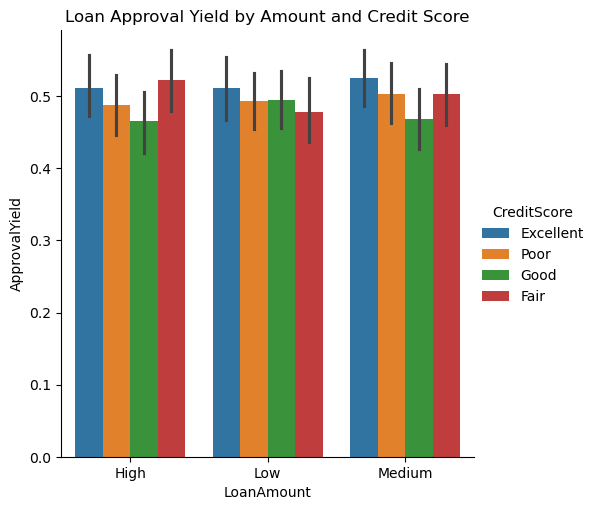

In [3]:
# Use Seaborn to create the bar graph
sns.catplot(x="LoanAmount", 
            y="ApprovalYield", 
            hue="CreditScore", 
            kind="bar", 
            data=loan_approval_yield)
plt.title("Loan Approval Yield by Amount and Credit Score")
plt.show()

### Exploring customer satisfaction

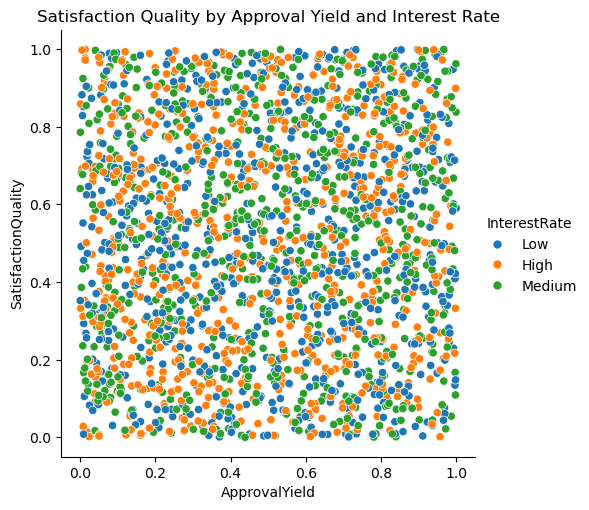

In [7]:
# Merge the two datasets
merged_data = pd.merge(loan_approval_yield, 
                      customer_satisfaction, 
                      on='ApplicationID')

# Use Seaborn to create the scatter plot
sns.relplot(x="ApprovalYield", 
            y="SatisfactionQuality", 
            hue="InterestRate", 
            kind="scatter", 
            data=merged_data)
plt.title("Satisfaction Quality by Approval Yield and Interest Rate")
plt.show()

## Addressing complexities in experimental data

### Check for heteroscedasticity in shelf life

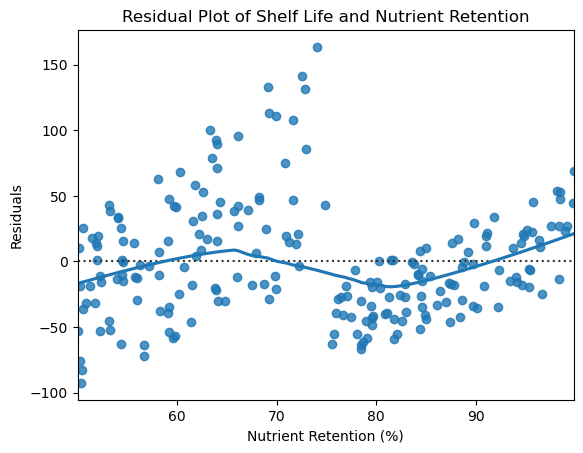

In [3]:
# Check for heteroscedasticity with a residual plot
sns.residplot(x='NutrientRetention', y='ShelfLife', 
         data=food_preservation, lowess=True)
plt.title('Residual Plot of Shelf Life and Nutrient Retention')
plt.xlabel('Nutrient Retention (%)')
plt.ylabel('Residuals')
plt.show()

### Exploring and transforming shelf life data

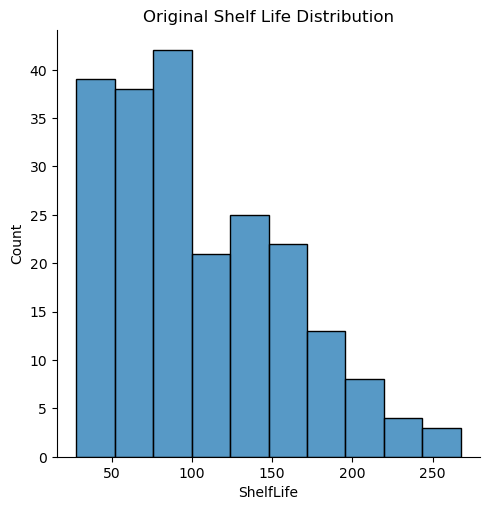

<Figure size 640x480 with 0 Axes>

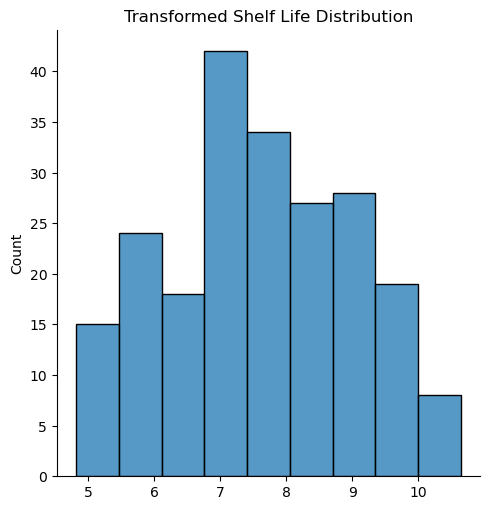

In [7]:
# Visualize the original ShelfLife distribution
sns.displot(food_preservation['ShelfLife'])
plt.title('Original Shelf Life Distribution')
plt.show()

# Create a Box-Cox transformation
ShelfLifeTransformed, _ = boxcox(food_preservation['ShelfLife'])

# Visualize the transformed ShelfLife distribution
plt.clf()
sns.displot(ShelfLifeTransformed)
plt.title('Transformed Shelf Life Distribution')
plt.show()

## Applying nonparametric tests in experimental analysis

### Visualizing and testing preservation methods

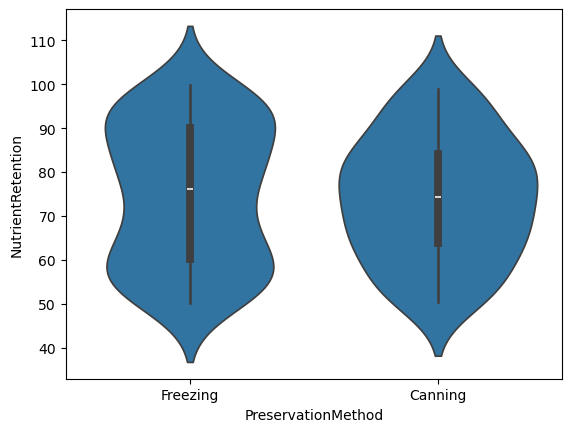

Mann Whitney U test p-value: 0.7211582066472636


In [12]:
# Filter to Freezing and Canning data
condensed_food_data = food_preservation[food_preservation['PreservationMethod'].isin(['Freezing', 'Canning'])]

# Create a violin plot for nutrient retention by preservation method
sns.violinplot(data=condensed_food_data, 
     x="PreservationMethod", 
     y="NutrientRetention")
plt.show()

# Separate nutrient retention for Freezing and Canning methods
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']

# Perform Mann Whitney U test
u_stat, p_val = mannwhitneyu(
    freezing,
    canning
)

# Print the p-value
print("Mann Whitney U test p-value:", p_val)

### Further analyzing food preservation techniques

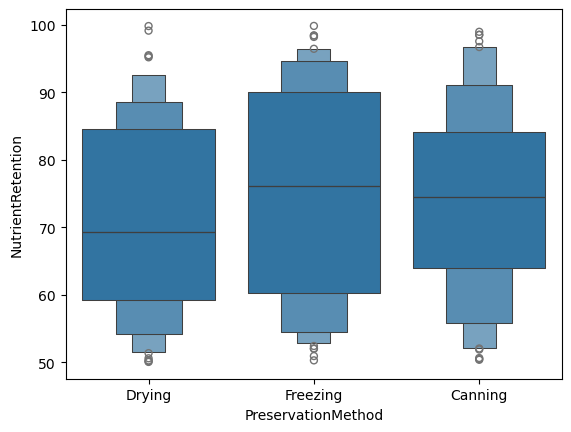

Kruskal-Wallis test p-value: 0.38534203658094596


In [15]:
# Create a boxen plot for nutrient retention by preservation
sns.boxenplot(data=food_preservation, 
     x="PreservationMethod", 
     y="NutrientRetention")
plt.show()

# Separate nutrient retention for each preservation method
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']
drying = food_preservation[food_preservation['PreservationMethod'] == 'Drying']['NutrientRetention']

# Perform Kruskal-Wallis test
k_stat, k_pval = kruskal(
    freezing,
    canning,
    drying
)
print("Kruskal-Wallis test p-value:", k_pval)

In [9]:
food_preservation

,ProductID,PreservationMethod,FoodType,NutrientRetention,ShelfLife
0,1,Drying,Fruit,59.17,184.04
1,2,Freezing,Meat,72.29,104.46
2,3,Drying,Fruit,80.06,75.03
3,4,Canning,Fruit,98.50,103.34
4,5,Canning,Vegetable,59.09,97.46
...,...,...,...,...,...
210,211,Canning,Fruit,53.17,192.76
211,212,Freezing,Vegetable,54.39,83.77
212,213,Freezing,Fruit,55.83,131.73
213,214,Canning,Meat,89.71,35.53
